<a href="https://colab.research.google.com/github/JumanaRahim/workshop/blob/master/drowsiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/dataset_new.zip 

Archive:  /content/dataset_new.zip
   creating: dataset_new/
   creating: dataset_new/test/
   creating: dataset_new/test/no_yawn/
  inflating: dataset_new/test/no_yawn/1004.jpg  
  inflating: dataset_new/test/no_yawn/1007.jpg  
  inflating: dataset_new/test/no_yawn/1010.jpg  
  inflating: dataset_new/test/no_yawn/1033.jpg  
  inflating: dataset_new/test/no_yawn/1044.jpg  
  inflating: dataset_new/test/no_yawn/1050.jpg  
  inflating: dataset_new/test/no_yawn/1063.jpg  
  inflating: dataset_new/test/no_yawn/1067.jpg  
  inflating: dataset_new/test/no_yawn/1096.jpg  
  inflating: dataset_new/test/no_yawn/1114.jpg  
  inflating: dataset_new/test/no_yawn/1118.jpg  
  inflating: dataset_new/test/no_yawn/1129.jpg  
  inflating: dataset_new/test/no_yawn/113.jpg  
  inflating: dataset_new/test/no_yawn/1134.jpg  
  inflating: dataset_new/test/no_yawn/115.jpg  
  inflating: dataset_new/test/no_yawn/1213.jpg  
  inflating: dataset_new/test/no_yawn/1267.jpg  
  inflating: dataset_new/test/no_yawn/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [38]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [39]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 1310 images belonging to 2 classes.


In [41]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test',
        target_size=(64,64),
        batch_size=32,
        class_mode='categorical')

Found 215 images belonging to 2 classes.


In [6]:
im=plt.imread("/content/drive/MyDrive/archive/dataset_new/train/yawn/11.jpg")


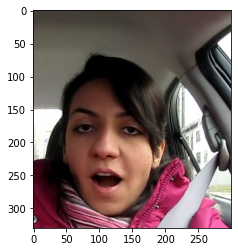

In [ ]:
plt.imshow(im[20:350, 200:500, :])

In [10]:
import os

In [11]:
import glob
i=0
for img in glob.glob("/content/drive/MyDrive/archive/dataset_new/test/no_yawn/*.jpg"):
  i=i+1

  n= cv2.imread(img)
  im=n[20:350, 200:500, :]
  cv2.imwrite(os.path.join("/content/drowsiness_cropped/test/no_yawn" , f'test_images_noyawn{i}.jpg'), im)

In [12]:
for img in glob.glob("/content/drive/MyDrive/archive/dataset_new/test/yawn/*.jpg"):
  i=i+1

  n= cv2.imread(img)
  im=n[20:350, 200:500, :]
  cv2.imwrite(os.path.join("/content/drowsiness_cropped/test/yawn" , f'test_images_yawn{i}.jpg'), im)

In [13]:
i=0
for img in glob.glob("/content/drive/MyDrive/archive/dataset_new/train/no_yawn/*.jpg"):
  i=i+1

  n= cv2.imread(img)
  im=n[20:350, 200:500, :]
  cv2.imwrite(os.path.join("/content/drowsiness_cropped/train/no_yawn" , f'train_images_noyawn{i}.jpg'), im)

In [14]:
i=0
for img in glob.glob("/content/drive/MyDrive/archive/dataset_new/train/yawn/*.jpg"):
  i=i+1

  n= cv2.imread(img)
  im=n[20:350, 200:500, :]
  cv2.imwrite(os.path.join("/content/drowsiness_cropped/train/yawn" , f'train_images_yawn{i}.jpg'), im)

In [15]:
# Add the image to a batch
from keras.preprocessing import image
from tensorflow.keras import layers
im=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test")



Found 215 files belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


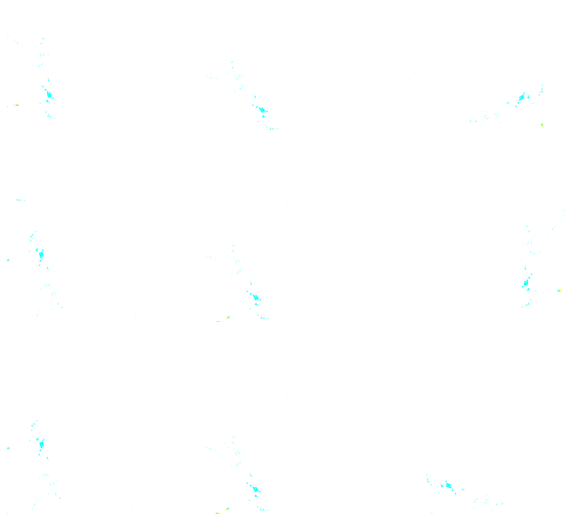

In [16]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Add the image to a batch.
image = tf.cast(tf.expand_dims(n, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [17]:
im=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train")

Found 1310 files belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


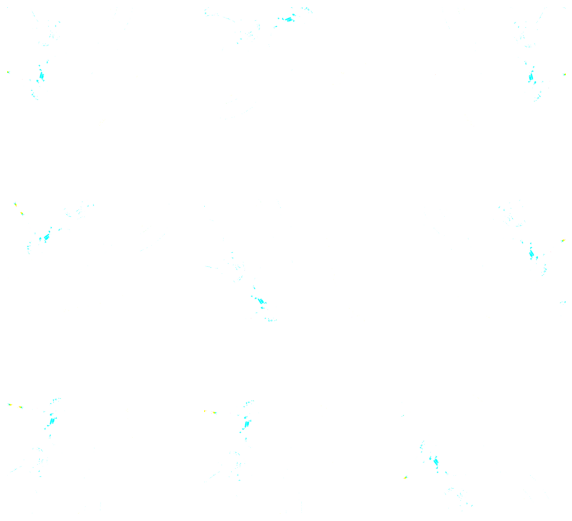

In [18]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Add the image to a batch.
image = tf.cast(tf.expand_dims(n, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [19]:
#build CNN model
#intialize
cnn=tf.keras.models.Sequential()

In [20]:
from tensorflow.keras import layers

In [168]:
#convolution
from keras.regularizers import l2
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3],
                               kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))





In [169]:
#Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.3))

In [170]:
#add one more layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3],
       kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))

In [171]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3],
       kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [172]:
#Flatten
cnn.add(tf.keras.layers.Flatten())

In [173]:
#Full Connection
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Dense(units=64,activation='relu'))

In [174]:
#Output layer
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [175]:
#Compile the model
cnn.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [176]:
cnn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 dropout_5 (Dropout)         (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                 

In [177]:
history=cnn.fit(x=train_generator,validation_data=validation_generator,epochs=50)

Epoch 1/50
41/41 [==============================] - 7s 149ms/step - loss: 1.1338 - accuracy: 0.5000 - val_loss: 0.8762 - val_accuracy: 0.5000
Epoch 2/50
41/41 [==============================] - 6s 142ms/step - loss: 0.7827 - accuracy: 0.5000 - val_loss: 0.7251 - val_accuracy: 0.5000
Epoch 3/50
41/41 [==============================] - 6s 143ms/step - loss: 0.7082 - accuracy: 0.5000 - val_loss: 0.6983 - val_accuracy: 0.5000
Epoch 4/50
41/41 [==============================] - 6s 143ms/step - loss: 0.6956 - accuracy: 0.5000 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 5/50
41/41 [==============================] - 7s 171ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/50
41/41 [==============================] - 6s 144ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/50
41/41 [==============================] - 6s 145ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 

In [178]:
import tensorflow as tf
from tensorflow import keras
model=cnn
model.save('/content/drive/MyDrive/camera/cnnmodel.h5')

In [179]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/camera/cnnmodel.h5')
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 dropout_5 (Dropout)         (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                 

In [183]:
Y_pred = model.predict_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [184]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [185]:
Y_pred

array([[0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.50001395],
       [0.500

In [186]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Y_pred = model.predict_generator(validation_generator)
cm= confusion_matrix(validation_generator.classes, Y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


ValueError: ignored

In [162]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
disp.plot()
plt.show()

NameError: ignored

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


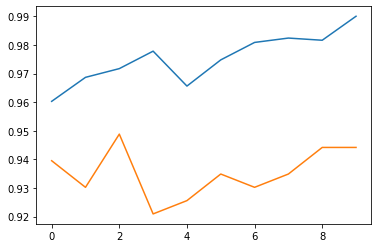

In [159]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.show()

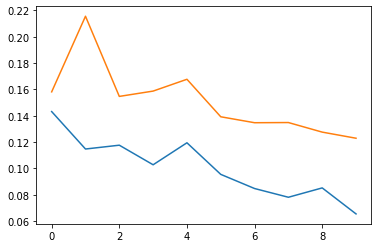

In [160]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [61]:
import numpy as np
from keras.preprocessing import image
test_image=image.load_img('/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test/no_yawn/test_images_noyawn1.jpg',target_size=(64,64))

test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
train_generator.class_indices
if result[0][0]==1:
    prediction='yawn'
if result[0][1]==1:
    prediction='no yawn'

In [62]:
prediction

'yawn'

In [63]:
 train_generator.class_indices
    

{'no_yawn': 0, 'yawn': 1}

In [64]:
result


array([[1.000000e+00, 5.396631e-24]], dtype=float32)

In [65]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as pl

In [96]:
image_size = [224,224]

In [97]:
train_path = '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train'
valid_path = '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test'

In [98]:
# Add the image to a batch
from keras.preprocessing import image
from tensorflow.keras import layers
im=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test")

Found 215 files belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


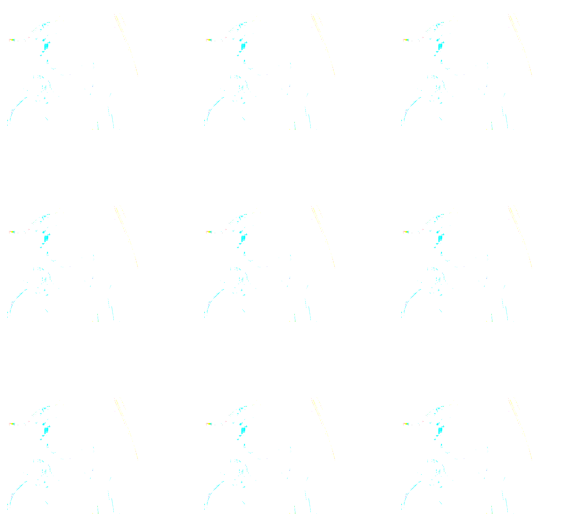

In [99]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Add the image to a batch.
image = tf.cast(tf.expand_dims(n, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [100]:
im=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train")

Found 1310 files belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


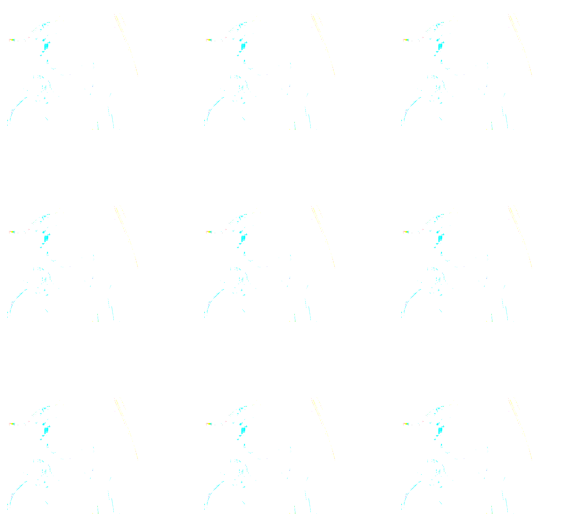

In [101]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Add the image to a batch.
image = tf.cast(tf.expand_dims(n, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [132]:
vgg = VGG16(input_shape=image_size + [3], weights='imagenet', include_top=False)

In [133]:
 # don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [134]:
# useful for getting number of classes
folders = glob("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train/*")
print(len(folders))

2


In [135]:
folders

['/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train/no_yawn',
 '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train/yawn']

In [136]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_4')>

In [137]:
for layer in vgg.layers:
  layer.trainable = False

In [138]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(1, activation='sigmoid')(x)

In [139]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [140]:
# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [141]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [142]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [143]:
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1310 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


In [144]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss", patience=20,verbose=2)

In [146]:
# early stopping
history =model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
41/41 [==============================] - 22s 513ms/step - loss: 0.1431 - accuracy: 0.9603 - val_loss: 0.1581 - val_accuracy: 0.9395
Epoch 2/10
41/41 [==============================] - 21s 503ms/step - loss: 0.1147 - accuracy: 0.9687 - val_loss: 0.2155 - val_accuracy: 0.9302
Epoch 3/10
41/41 [==============================] - 21s 501ms/step - loss: 0.1176 - accuracy: 0.9718 - val_loss: 0.1546 - val_accuracy: 0.9488
Epoch 4/10
41/41 [==============================] - 22s 527ms/step - loss: 0.1027 - accuracy: 0.9779 - val_loss: 0.1587 - val_accuracy: 0.9209
Epoch 5/10
41/41 [==============================] - 20s 493ms/step - loss: 0.1194 - accuracy: 0.9656 - val_loss: 0.1676 - val_accuracy: 0.9256
Epoch 6/10
41/41 [==============================] - 20s 486ms/step - loss: 0.0955 - accuracy: 0.9748 - val_loss: 0.1392 - val_accuracy: 0.9349
Epoch 7/10
41/41 [==============================] - 20s 486ms/step - loss: 0.0847 - accuracy: 0.9809 - val_loss: 0.1347 - val_accuracy: 0.9302

In [147]:
import tensorflow as tf
from tensorflow import keras
model=cnn
model.save('/content/drive/MyDrive/camera/vgg16model.h5')

In [151]:
from tensorflow import keras
model = keras.models.load_model("/content/drive/MyDrive/camera/vgg16model.h5")
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                  

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


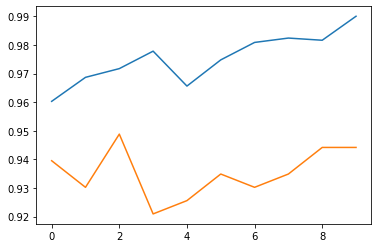

In [154]:
# accuracy
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.show()

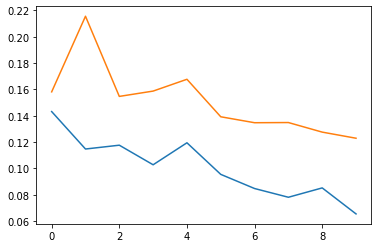

In [155]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [156]:
Y_pred = model.predict_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [157]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(validation_generator.classes, y_pred)

NameError: ignored

In [187]:
import numpy as np
from keras.preprocessing.image import image
from keras.preprocessing.image import img_to_array
from keras.models import Sequential

In [190]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(64,64,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [205]:
resnet_model.add(Flatten())
resnet_model.add(Dense(200, activation='relu'))
resnet_model.add(Dense(1, activation='softmax'))

In [198]:
resnet_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_10 (Flatten)        (None, 2048)              0         
                                                                 
 dense_15 (Dense)            (None, 214)               438486    
                                                                 
 dense_16 (Dense)            (None, 1)                 215       
                                                                 
Total params: 24,026,413
Trainable params: 438,701
Non-trainable params: 23,587,712
_________________________________________________________________


In [201]:
resnet_model.compile(
  loss='binary_crossentropy',
  optimizer='RMSprop',
  metrics=['accuracy'])

In [204]:
history =resnet_model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
41/41 [==============================] - 20s 487ms/step - loss: 0.6558 - accuracy: 0.5000 - val_loss: 0.6818 - val_accuracy: 0.4930
Epoch 2/10
41/41 [==============================] - 19s 466ms/step - loss: 0.6689 - accuracy: 0.5000 - val_loss: 0.6054 - val_accuracy: 0.4930
Epoch 3/10
41/41 [==============================] - 19s 460ms/step - loss: 0.6380 - accuracy: 0.5000 - val_loss: 0.6862 - val_accuracy: 0.4930
Epoch 4/10
41/41 [==============================] - 19s 465ms/step - loss: 0.6438 - accuracy: 0.5000 - val_loss: 0.6062 - val_accuracy: 0.4930
Epoch 5/10
41/41 [==============================] - 19s 463ms/step - loss: 0.6579 - accuracy: 0.5000 - val_loss: 0.8361 - val_accuracy: 0.4930
Epoch 6/10
41/41 [==============================] - 19s 461ms/step - loss: 0.6281 - accuracy: 0.5000 - val_loss: 0.6449 - val_accuracy: 0.4930
Epoch 7/10
41/41 [==============================] - 19s 466ms/step - loss: 0.6245 - accuracy: 0.5000 - val_loss: 0.5988 - val_accuracy: 0.4930

In [193]:

history =resnet_model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25, callbacks=[early_stopping], verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/25
41/41 - 25s - loss: 6.0739 - accuracy: 0.0000e+00 - val_loss: 5.9550 - val_accuracy: 0.0000e+00 - 25s/epoch - 600ms/step
Epoch 2/25
41/41 - 19s - loss: 6.0718 - accuracy: 0.0000e+00 - val_loss: 5.9550 - val_accuracy: 0.0000e+00 - 19s/epoch - 458ms/step
Epoch 3/25
41/41 - 19s - loss: 6.0754 - accuracy: 0.0000e+00 - val_loss: 5.9550 - val_accuracy: 0.0000e+00 - 19s/epoch - 473ms/step
Epoch 4/25


KeyboardInterrupt: ignored

In [206]:
from tensorflow.keras.applications.inception_v3 import InceptionV3


In [207]:
pre_trained_model = InceptionV3(input_shape = (150,150,3) ,include_top = False,weights = 'imagenet')

87924736/87910968 [==============================] - 0s 0us/step


In [208]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [209]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.959):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [210]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)  

In [211]:
model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [212]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [213]:
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train",
                                                    batch_size = 32,
                                                    class_mode = 'binary', 
                                                    target_size = (150,150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( "/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test",
                                                          batch_size  = 32,
                                                          class_mode  = 'binary', 
                                                          target_size = (150,150))

Found 1310 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


In [214]:
callbacks = myCallback()
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch =50,
            epochs =50,
            validation_steps =25,
            verbose = 2,
            callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/50
50/50 - 20s - loss: 2.2076 - acc: 0.5542 - val_loss: 0.5854 - val_acc: 0.6698 - 20s/epoch - 390ms/step
